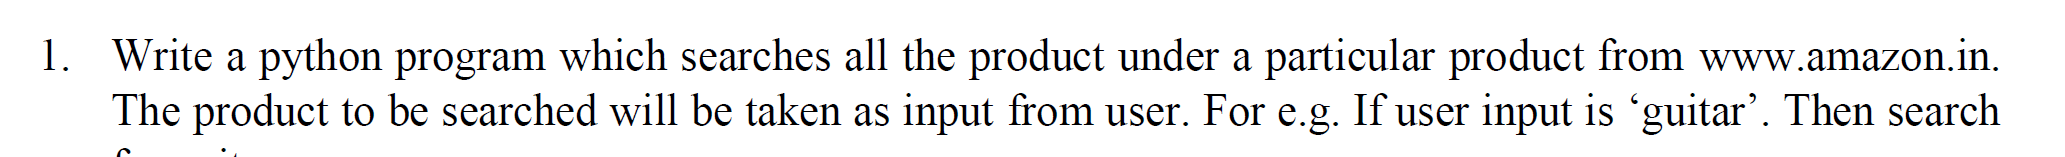

In [42]:
# importing required libraries
import pandas as pd
import warnings
import time
warnings.filterwarnings("ignore")
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
from selenium.common.exceptions import NoSuchElementException

In [28]:
# initating the chromedriver
driver = webdriver.Chrome("D:\Web Scrapper\chromedriver.exe")

In [29]:
# initating the chrome web driver
driver = webdriver.Chrome("D:\Web Scrapper\chromedriver.exe")

# getting to the url
driver.get("https://www.amazon.in/")
time.sleep(5)

In [30]:
text=driver.find_element_by_xpath("//*[@id='twotabsearchtextbox']")
# getting input from user
x = input("enter the item you want to search ")
text.send_keys(x)
# clicking on search button
search=driver.find_element_by_xpath("//*[@id='nav-search-submit-button']")
search.click()

enter the item you want to search guitar


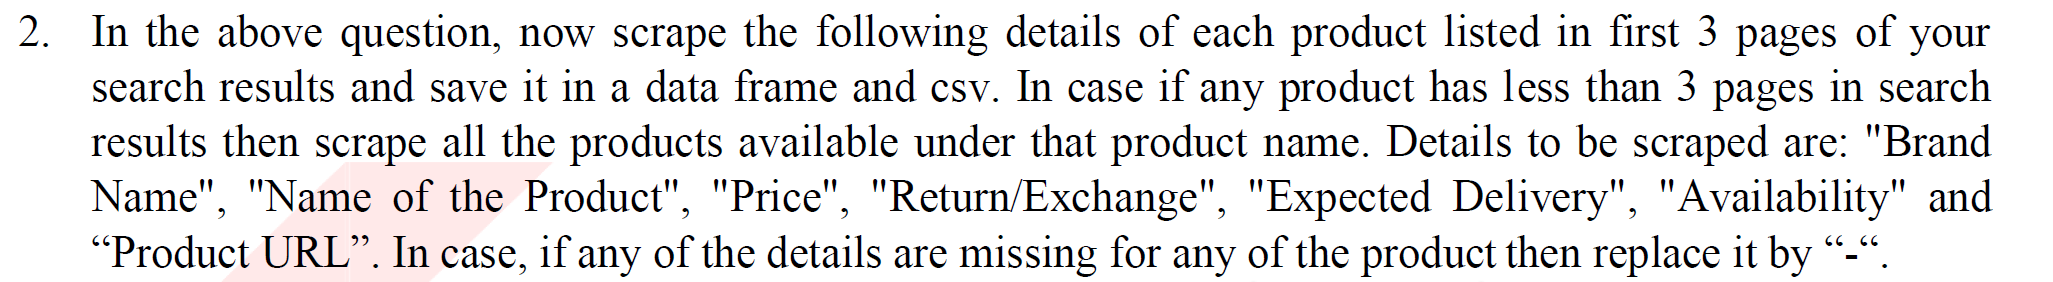

In [5]:
# getting urls of all products within 3 pages
urls = []

for i in range(3):

  

    url= driver.find_elements_by_xpath("//a[@class='a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal']")

    for j in url:

        urls.append(j.get_attribute('href'))

    #clicking on next button to jump on next page

    nxt_button = driver.find_element_by_xpath("//a[@class='s-pagination-item s-pagination-next s-pagination-button s-pagination-separator']")                                         

    nxt_button.click()                                                   

    time.sleep(5)

In [155]:
# defining the function for getting brand name price etc
def a():
    

    try:
        bran=driver.find_element_by_xpath("//tr[@class='a-spacing-small po-brand']")
        brand.append(bran.text.split(" ")[1])
        

    except NoSuchElementException :
        brand.append('-')
        
        
def b():

    try:
        nam = driver.find_element_by_xpath("//h1[@class='a-size-large a-spacing-none']")
        name.append(nam.text)

    except NoSuchElementException :
        name.append('-')
        
        
        
def c():
    
    try:
        
        pri1 = driver.find_element_by_xpath("//div[@id='corePrice_feature_div']")
        price.append(pri1.text)

    except NoSuchElementException :
        price.append('-')
        
        
        
def d ():
    
    try:
        
        rep = driver.find_elements_by_xpath("//a[@class='a-size-small a-link-normal a-text-normal']")
        replace.append(rep[1].text)

    
    
    except (NoSuchElementException,IndexError) :
        replace.append('-')
    
    
        
def e ():
    
    try:
        
        deli = driver.find_element_by_xpath("//div[@id='mir-layout-DELIVERY_BLOCK-slot-DELIVERY_MESSAGE']")
        delivery.append(deli.text.replace("\n",""))

    
    
    except NoSuchElementException :
        delivery.append('-')
    

    
def f ():
    
    try:
        
        avai = driver.find_element_by_xpath("//div[@id='availabilityInsideBuyBox_feature_div']")
        availability.append(avai.text)

    
    
    except NoSuchElementException :
        availability.append('-')
    
        
        

In [156]:
#calling the functions for each url to scrap data using for loop 
brand = []
name=[]
price=[]
replace=[]
delivery=[]
availability=[]

for u in urls:
    driver.get(u)
    time.sleep(5)
    a()
    b()
    c()
    d()
    e()
    f()
    
    

In [167]:
# creating the dataframe
df = pd.DataFrame()
df["Brand"] = brand
df["Name"] = name
df["Price"] = price
df["Replacement"] = replace
df["Delivery"] = delivery
df["Availability"] = availability
df["Url"] = urls
df

,Brand,Name,Price,Replacement,Delivery,Availability,Url
0,Kadence,Kadence Frontier guitar with Online Guitar lea...,"₹5,399.00 (Save 11%)",7 Days Replacement,"FREE delivery: Saturday, June 4 Details",,https://www.amazon.in/gp/slredirect/picassoRed...
1,Kadence,Kadence Frontier Jumbo Semi Acoustic Guitar Wi...,"₹7,348.00",7 Days Replacement,"FREE delivery: Saturday, June 4 Details",In stock.,https://www.amazon.in/gp/slredirect/picassoRed...
2,Blueberry,"Blueberry 38C, 38"" Acoustic Guitar Kit with Ba...","₹2,560.00",7 Days Replacement,"FREE delivery: Thursday, June 9 Details",In stock.,https://www.amazon.in/gp/slredirect/picassoRed...
3,Blueberry,Blueberry B-D38 Sunburst 38 Inch Acoustic Guit...,"₹2,795\n00",7 Days Replacement,"FREE delivery: Thursday, June 9 Details",In stock.,https://www.amazon.in/gp/slredirect/picassoRed...
4,Juârez,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...","₹2,095\n00",7 Days Replacement,"FREE delivery: Friday, June 3 Details",In stock.,https://www.amazon.in/Juarez-Acoustic-Cutaway-...
5,Intern,INTERN 41 inches Cutaway Shape Acoustic Guitar...,"₹7,495\n00",7 Days Replacement,"FREE delivery: Friday, June 3 Details",In stock.,https://www.amazon.in/Acoustic-plectrums-stabi...
6,Intern,"Intern INT-38C Acoustic Guitar Kit, With Bag, ...","₹2,289\n00",7 Days Replacement,"FREE delivery: Friday, June 3 Details",In stock.,https://www.amazon.in/Intern-INT-38C-Acoustic-...
7,JUAREZ,"Juarez Acoustic Guitar, 38 Inch Curved Body Cu...","₹2,639\n00",7 Days Replacement,"FREE delivery: Friday, June 3 Details",In stock.,https://www.amazon.in/Juarez-Acoustic-Guitar-C...
8,YAMAHA,Yamaha Classical Guitar C40//02,"₹7,200\n00",7 Days Replacement,"FREE delivery: Thursday, June 2 Details",In stock.,https://www.amazon.in/Yamaha-Classical-Guitar-...
9,Intern,Intern 38C Cutaway Design Black Acoustic Guita...,"₹2,090\n00",7 Days Replacement,"FREE delivery: Friday, June 3 Details",In stock.,https://www.amazon.in/Intern-38-inch-Cutaway-D...


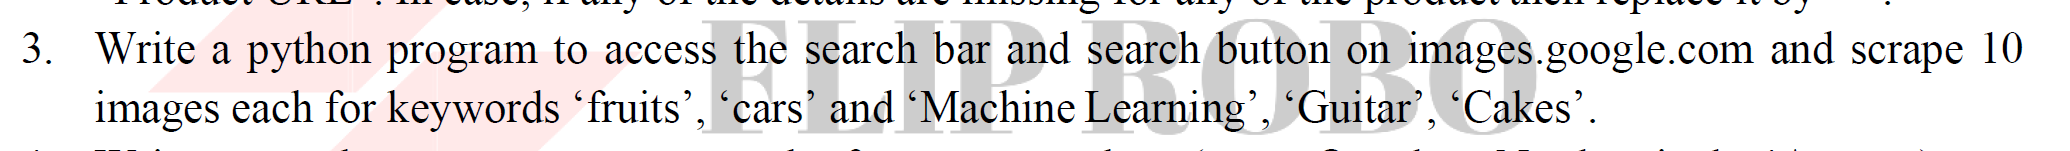

In [33]:
# importing required libraries
import pandas as pd
import requests
import warnings
import time
warnings.filterwarnings("ignore")
from selenium import webdriver

In [37]:
# creating a empty list
fruits=[]
cars=[]
machine=[]
guitar=[]
cakes=[]
list1=['fruits', 'cars' , 'Machine Learning', 'Guitar', 'Cakes']
list2=[fruits, cars , machine, guitar, cakes]

In [39]:
# getting link for images using loop
j = 0
for i in list1:
    
    # initating the chromedriver
    driver = webdriver.Chrome("D:\Web Scrapper\chromedriver.exe")
    #getting to the url
    driver.get("https://images.google.com/")
    time.sleep(5)
    #finding the search filed
    s=driver.find_element_by_xpath("//*[@id='sbtc']/div/div[2]/input")
    s.send_keys(i)
    time.sleep(3)
    # clicking on search button
    c=driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button")
    c.click()
    time.sleep(3)
    driver.execute_script("window.scrollBy(0,30000)")
    im=driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
    for url in im:
        source = url.get_attribute('src')
        if source is not None:
            if (source[0:4] == 'http'):
                list2[j].append(source)
    j+=1    


In [50]:
# downloading images of fruits
for fr in range(len(fruits)):
    file = open("D:/Web Scrapper/Pictures/"+"img"+str(fr)+".jpg",'wb')
    fi = requests.get(fruits[fr])
    file.write(fi.content)

In [51]:
#downloading images of cars
for fr in range(len(cars)):
    file = open("D:/Web Scrapper/Pictures/"+"img"+str(fr)+".jpg",'wb')
    fi = requests.get(cars[fr])
    file.write(fi.content)

In [53]:
# downloading images of machine
for fr in range(len(machine)):
    file = open("D:/Web Scrapper/Pictures/"+"img"+str(fr)+".jpg",'wb')
    fi = requests.get(machine[fr])
    file.write(fi.content)

In [54]:
# downloading images of cakes
for fr in range(len(cakes)):
    file = open("D:/Web Scrapper/Pictures/"+"img"+str(fr)+".jpg",'wb')
    fi = requests.get(cakes[fr])
    file.write(fi.content)

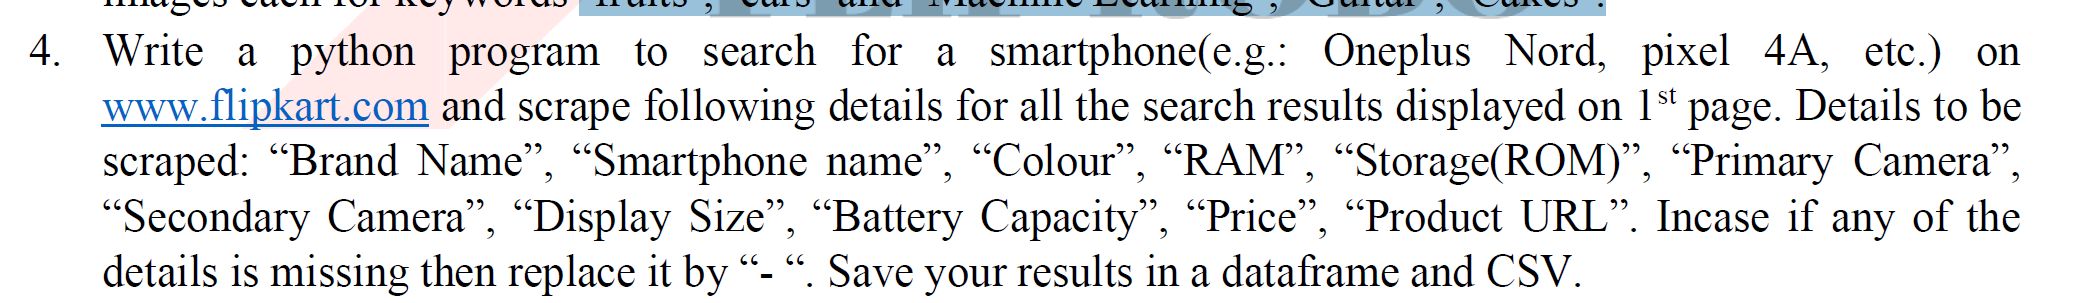

In [81]:
# importing required libraries
import pandas as pd
import warnings
import time
warnings.filterwarnings("ignore")
from selenium import webdriver
from bs4 import BeautifulSoup

In [82]:
# initating the chrome web driver
driver = webdriver.Chrome("D:\Web Scrapper\chromedriver.exe")

# getting to the url
driver.get("https://www.flipkart.com/")
time.sleep(2)
# we get login page sometimes so in order to close it
try:
    xmark = driver.find_element_by_xpath("/html/body/div[2]/div/div/button")
    xmark.click()
    
except:
    pass

time.sleep(2)
# finding the search field by absolute xpath
designation = driver.find_element_by_xpath("/html/body/div/div/div[1]/div[1]/div[2]/div[2]/form/div/div/input")

# sending the string sunglasses to search field
designation.send_keys("pixel 4A")

# now searching search button by relative xpath and clicking it
search = driver.find_element_by_xpath("//button[@class='L0Z3Pu']")
search.click()
time.sleep(3)

In [83]:
soup = BeautifulSoup(driver.page_source)
k=soup.find_all('div',class_='_3pLy-c row')
ra=[sto.find("div",class_="_4rR01T").text.split("(")[1].split(",")[0].strip().replace(")","") for sto in k]

In [88]:
soup = BeautifulSoup(driver.page_source)
k=soup.find_all('div',class_='_3pLy-c row')
u = soup.find_all('a',class_="_1fQZEK")
title=[hk.find('div',class_="_4rR01T").text for hk in k]
price = [pr.find("div",class_='_30jeq3 _1_WHN1').text for pr in k]
color=[co.find('div',class_="_4rR01T").text.split("(")[1].split(",")[0]for co in k]
storage=[sto.find("div",class_="_4rR01T").text.split("(")[1].split(",")[1].strip().replace(")","") for sto in k]
camera =  [ca.find_all("li",class_='rgWa7D')[2].text for ca in k]
display  = [di.find_all("li",class_='rgWa7D')[1].text for di in k]
battery = [ba.find_all("li",class_='rgWa7D')[3].text for ba in k]
brand = [ba.find('div',class_="_4rR01T").text.split(" ")[0] for ba in k]
ram = [ra.find_all("li",class_='rgWa7D')[0].text.split("|")[0] for ra in k]
url = ["https://www.flipkart.com"+ur["href"] for ur in u]

In [90]:
flipkart = pd.DataFrame({"Brand":brand,"SmartPhoneName":title,"Display":display,"Camera":camera,"Battery":battery,"RAM":ram,"Storage":storage,"Color":color,"Price":price,"URL":url})

In [91]:
flipkart

,Brand,SmartPhoneName,Display,Camera,Battery,RAM,Storage,Color,Price,URL
0,Google,"Google Pixel 4a (Just Black, 128 GB)",14.76 cm (5.81 inch) Full HD+ Display,12.2MP Rear Camera | 8MP Front Camera,3140 mAh Battery,6 GB RAM,128 GB,Just Black,"₹31,999",https://www.flipkart.com/google-pixel-4a-just-...
1,vivo,"vivo T1 44W (Midnight Galaxy, 128 GB)",16.36 cm (6.44 inch) Full HD+ AMOLED Display,50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium Battery,4 GB RAM,128 GB,Midnight Galaxy,"₹14,499",https://www.flipkart.com/vivo-t1-44w-midnight-...
2,vivo,"vivo T1 44W (Ice Dawn, 128 GB)",16.36 cm (6.44 inch) Full HD+ AMOLED Display,50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium Battery,4 GB RAM,128 GB,Ice Dawn,"₹14,499",https://www.flipkart.com/vivo-t1-44w-ice-dawn-...
3,vivo,"vivo T1 44W (Starry Sky, 128 GB)",16.36 cm (6.44 inch) Full HD+ AMOLED Display,50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium Battery,6 GB RAM,128 GB,Starry Sky,"₹15,999",https://www.flipkart.com/vivo-t1-44w-starry-sk...
4,vivo,"vivo T1 44W (Starry Sky, 128 GB)",16.36 cm (6.44 inch) Full HD+ AMOLED Display,50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium Battery,8 GB RAM,128 GB,Starry Sky,"₹17,999",https://www.flipkart.com/vivo-t1-44w-starry-sk...
5,vivo,"vivo T1 44W (Starry Sky, 128 GB)",16.36 cm (6.44 inch) Full HD+ AMOLED Display,50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium Battery,4 GB RAM,128 GB,Starry Sky,"₹14,499",https://www.flipkart.com/vivo-t1-44w-starry-sk...
6,vivo,"vivo T1 44W (Midnight Galaxy, 128 GB)",16.36 cm (6.44 inch) Full HD+ AMOLED Display,50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium Battery,6 GB RAM,128 GB,Midnight Galaxy,"₹15,999",https://www.flipkart.com/vivo-t1-44w-midnight-...
7,vivo,"vivo T1 44W (Ice Dawn, 128 GB)",16.36 cm (6.44 inch) Full HD+ AMOLED Display,50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium Battery,8 GB RAM,128 GB,Ice Dawn,"₹17,999",https://www.flipkart.com/vivo-t1-44w-ice-dawn-...
8,vivo,"vivo T1 44W (Midnight Galaxy, 128 GB)",16.36 cm (6.44 inch) Full HD+ AMOLED Display,50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium Battery,8 GB RAM,128 GB,Midnight Galaxy,"₹17,999",https://www.flipkart.com/vivo-t1-44w-midnight-...
9,Redmi,"Redmi 9A Sport (Coral Green, 32 GB)",16.59 cm (6.53 inch) HD+ Display,13MP Rear Camera | 5MP Front Camera,5000 mAh Battery,3 GB RAM,32 GB,Coral Green,"₹7,977",https://www.flipkart.com/redmi-9a-sport-coral-...


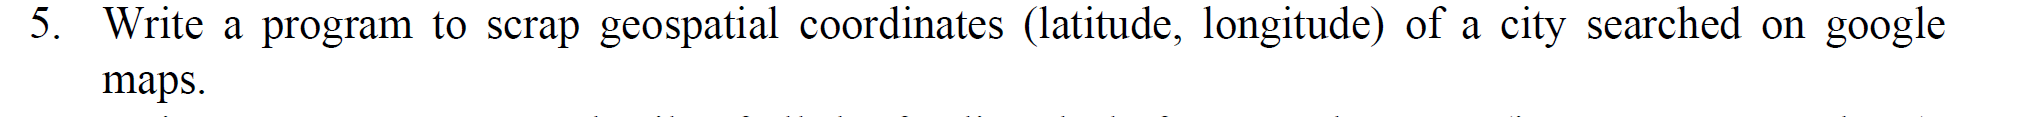

In [150]:
# importing required libraries
import pandas as pd
import warnings
import time
warnings.filterwarnings("ignore")
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys

In [151]:
# initating the chrome web driver
driver = webdriver.Chrome("D:\Web Scrapper\chromedriver.exe")

# getting to the url
driver.get("https://www.google.com/maps")
time.sleep(2)
# we get login page sometimes so in order to close it

In [152]:
# finding the search field by absolute xpath
designation = driver.find_element_by_xpath("//*[@id='searchboxinput']")

# sending the string to search field
designation.send_keys("chennai")
# return is also called as enter so we are sending enter key
designation.send_keys(Keys.RETURN)


In [184]:
a = driver.current_url.split(",")[1].split("@")[1]
b = driver.current_url.split(",")[2]
print(f' the latitude is {a} the longitude is {b}')

 the latitude is 13.0478223 the longitude is 80.0689263


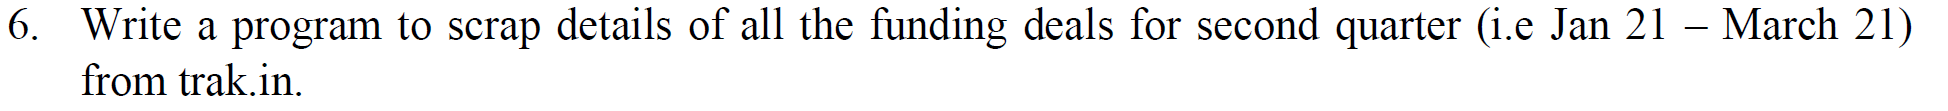

In [244]:
# importing required libraries
import pandas as pd
import warnings
import time
warnings.filterwarnings("ignore")
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [196]:
# initating the chrome web driver
driver = webdriver.Chrome("D:\Web Scrapper\chromedriver.exe")

# getting to the url
driver.get("https://trak.in/india-startup-funding-investment-2015/")
time.sleep(2)
# we get login page sometimes so in order to close it

In [239]:
df = pd.DataFrame(columns=["Sr.no","Date","Startup Name","Industry/vertical","sub vertical","city","Investor Name","Investment Type","Amount(USD)"])

In [241]:
tr=driver.find_elements_by_xpath("//tr[@class='row-2 even']")
tr1= driver.find_elements_by_xpath("//tr[@class='row-3 odd']")
tr2= driver.find_elements_by_xpath("//div[@class='dataTables_scroll']")
tc = driver.find_elements_by_xpath("//td[@class='column-1']")
tc1 = driver.find_elements_by_xpath("//td[@class='column-2']")
tc2 = driver.find_elements_by_xpath("//td[@class='column-3']")
tc3 = driver.find_elements_by_xpath("//td[@class='column-4']")
tc4 = driver.find_elements_by_xpath("//td[@class='column-5']")
tc5 = driver.find_elements_by_xpath("//td[@class='column-6']")
tc6 = driver.find_elements_by_xpath("//td[@class='column-7']")
tc7 = driver.find_elements_by_xpath("//td[@class='column-8']")
tc8 = driver.find_elements_by_xpath("//td[@class='column-9']")


In [245]:
c = [c.text for c in tc]
c1 = [c1.text for c1 in tc1]
c2 = [c2.text for c2 in tc2]
c3 = [c3.text for c3 in tc3]
c4 = [c4.text for c4 in tc4]
c5 = [c5.text for c5 in tc5]
c6 = [c6.text for c6 in tc6]
c7 = [c7.text for c7 in tc7]
c8 = [c8.text for c8 in tc8]

df["Sr.no"] = c
df["Date"]  = c1
df["Startup Name"] = c2
df["Industry/vertical"] = c3
df["sub vertical"] = c4
df["city"]= c5
df["Investor Name"] = c6
df["Investment Type"]= c7
df["Amount(USD)"]=c8


In [246]:
df

,Sr.no,Date,Startup Name,Industry/vertical,sub vertical,city,Investor Name,Investment Type,Amount(USD)
0,1,01/04/2021,BYJU’S,Edu-tech,Online tutoring,Bengaluru,Innoven Capital,Series F,"460,000,000"
1,2,05/04/2021,Meesho,E-commerce,Online reselling platform,Bengaluru,SoftBank Vision Fund 2,Series E,"300,000,000"
2,3,14/04/2021,Swiggy,Online Food Delivery,Online Food Delivery,Bengaluru,"Amansa Holdings, Carmignac, Falcon Edge Capita...",Series J,"343,000,000"
3,4,07/04/2021,Groww,FinTech,Investment platform,Bengaluru,"MC Global Edtech, B Capital, Baron, others",Series D,"83,000,000"
4,5,14/04/2021,Beldara,E-commerce,Global B2B marketplace,Mumbai,Hindustan Media Ventures,Venture,"7,400,000"
5,1,04/03/2021,DealShare,E-commerce,Online shopping platform,"Jaipur, Rajasthan",Innoven Capital,Debt Financing,"250,000,000"
6,2,31/03/2021,Uniphore,Technology,Conversational Service Automation (CSA),Palo Alto,Sorenson Capital Partners,Series D,"140,000,000"
7,3,30/03/2021,Dunzo,E-commerce,Hyper-local delivery app,Bengaluru,Krishtal Advisors Pte Ltd,Series E,"8,000,000"
8,4,30/03/2021,BYJU’S,Edu-tech,Online tutoring,Bengaluru,"MC Global Edtech, B Capital, Baron, others",Series F,"460,000,000"
9,5,23/03/2021,SkilloVilla,Edu-tech,Career and job-oriented upskilling.,Bengaluru,"Titan Capital, others",Seed,"300,000,000"


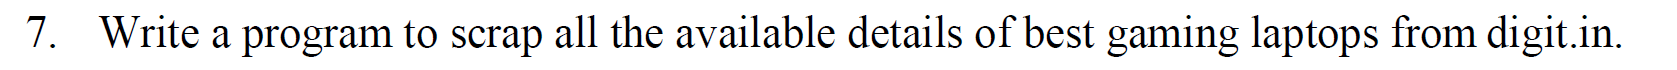

In [1]:
# importing required libraries
import pandas as pd
import warnings
import time
warnings.filterwarnings("ignore")
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [2]:
# initating the chrome web driver
driver = webdriver.Chrome("D:\Web Scrapper\chromedriver.exe")

# getting to the url
driver.get("https://www.digit.in/")
time.sleep(2)
# we get login page sometimes so in order to close it

In [3]:
lap=driver.find_element_by_xpath("/html/body/div[1]/div/div[4]/ul/li[3]/a")

In [4]:
lap.click()

In [5]:
lap1 = driver.find_element_by_xpath("/html/body/div[6]/div/div[2]/div[2]/ul/li[10]/a")
lap1.click()

In [60]:
li = driver.find_elements_by_xpath("//div[@class='TopNumbeHeading sticky-footer']")
laptop = [la.text.strip().replace("\n","") for la in li]

In [61]:
lii = driver.find_elements_by_xpath("//div[@class='TopNumbeHeading sticky-footer active']")
for lai in lii:
    a = lai.text.strip().replace("\n","")
laptop.append(a)

In [36]:
sp = driver.find_elements_by_xpath("//div[@class='Spcs-details']/table/tbody/tr[3]")
os = [lac.text for lac in sp]

In [38]:
di = driver.find_elements_by_xpath("//div[@class='Spcs-details']/table/tbody/tr[4]")
display = [dis.text for dis in di]

In [40]:
pr = driver.find_elements_by_xpath("//div[@class='Spcs-details']/table/tbody/tr[5]")
processor = [pro.text for pro in pr]

In [42]:
me = driver.find_elements_by_xpath("//div[@class='Spcs-details']/table/tbody/tr[6]")
memory = [meo.text for meo in me]

In [46]:
we = driver.find_elements_by_xpath("//div[@class='Spcs-details']/table/tbody/tr[7]")
weight = [wei.text for wei in we]

In [48]:
di = driver.find_elements_by_xpath("//div[@class='Spcs-details']/table/tbody/tr[8]")
dimension = [dim.text for dim in di]

In [52]:
gr = driver.find_elements_by_xpath("//div[@class='Spcs-details']/table/tbody/tr[9]")
graphic = [gra.text for gra in gr]

In [64]:
df = pd.DataFrame()
df["Laptop Name"] = laptop
df["OS"] = os
df["Display"] = display
df["Processor"] = processor
df["Memory"] = memory
df["weight"] = weight
df["Dimension"] = dimension
df["Graphic"] = graphic

In [65]:
 df

,Laptop Name,OS,Display,Processor,Memory,weight,Dimension,Graphic
0,1.MSI RAIDER GE76,OS : Windows 11 Home,"Display : 17"" (3840 x 2160)",Processor : 12th Gen Intel Core i9-12900HK | 5...,Memory : 2 TB SSD/16 GBGB DDR5,Weight : 2.9,Dimension : 397 x 284 x 26,Graphics Processor : NVIDIA GeForce RTX 3080Ti
1,2.ASUS ROG STRIX SCAR 15,OS : Windows 11 Home,"Display : 15.6"" (2560 x 1440)",Processor : 12th Gen Intel Core i9-12900H | 2....,Memory : 2 TB SSD/32 GBGB DDR5,Weight : 2.3,Dimension : 259 x 354 x 27,Graphics Processor : NVIDIA GeForce RTX 3070 Ti
2,3.ACER NITRO 5,OS : Windows 10,"Display : 15.6"" (1920 x 1080)",Processor : AMD Ryzen 9 Octa Core | 2.4 GHz,Memory : 1 TB HDD/16 GBGB DDR4,Weight : 2.4,Dimension : 363.4 x 255 x 23.9,Graphics Processor : NVIDIA GeForce RTX 3070
3,4.MSI STEALTH 15M,OS : Windows 10,"Display : 15.6"" (1920 x 1080)",Processor : Intel Core i7 11th Gen - 11375H | NA,Memory : 1 TB SSD/16 GBGB DDR4,Weight : 1.7,Dimension : 358.3 x 248 x 16.15,Graphics Processor : NVIDIA GeForce RTX 3060
4,5.ASUS ROG STRIX SCAR 15,OS : Windows 10,"Display : 15.6"" (2560 x 1440)",Processor : AMD Ryzen 9 Octa Core - 5900HX | 3...,Memory : 2 TB SSD/32 GBGB DDR4,Weight : 2.30,Dimension : 354 x 259 x 22.6,Graphics Processor : NVIDIA GeForce RTX 3080
5,6.ASUS ROG STRIX SCAR 15,OS : Windows 10 Home,"Display : 15.6"" (1920 x 1080)",Processor : AMD Ryzen™ 9 5900HX | 3.3 GHz,Memory : 1 TB SSD/16 GBGB DDR4,Weight : 2.30,Dimension : 35.4 x 25.9 x 2.26,Graphics Processor : NVIDIA® GeForce RTX™ 3070
6,7.ASUS ZEPHYRUS G14,OS : Windows 10 Home,"Display : 14"" (1920 x 1080)",Processor : AMD 3rd Gen Ryzen 9 | 3.3 GHz,Memory : 1 TB SSD/16 GBGB DDR4,Weight : 1.65,Dimension : 32.5 x 22.1 x 1.8,Graphics Processor : NVIDIA GeForce RTX 2060
7,8.HP OMEN 16,OS : Windows 11 Home,"Display : 16.1"" (1920 x 1080)",Processor : 12th Gen Intel Core i7-12700H | 4....,Memory : 1 TB SSD/16 GBGB DDR4,Weight : 2.32,Dimension : 36.92 x 24.8 x 2.3,Graphics Processor : NVIDIA GeForce RTX 3060
8,9.ASUS ROG ZEPHYRUS DUO 15,OS : Windows 10,"Display : 15.6"" (3840 x 1100)",Processor : Intel Core i7 10th Gen 10875H | NA,Memory : 512 GB SSD/4 GBGB DDR4,Weight : 2.4,Dimension : 268.30 x 360.00 x 20.90,Graphics Processor : NVIDIA GeForce RTX 2070 M...
9,10.ACER ASPIRE 7 GAMING LAPTOP,OS : Windows 10 Home,"Display : 15.6"" (1920 x 1080)",Processor : AMD Ryzen™ 5-5500U hexa-core | NA,Memory : 512 GB SSD/8 GBGB DDR4,Weight : 2.15,Dimension : 2.29 x 36.3 x 25.4,Graphics Processor : NVIDIA® GeForce® GTX 1650


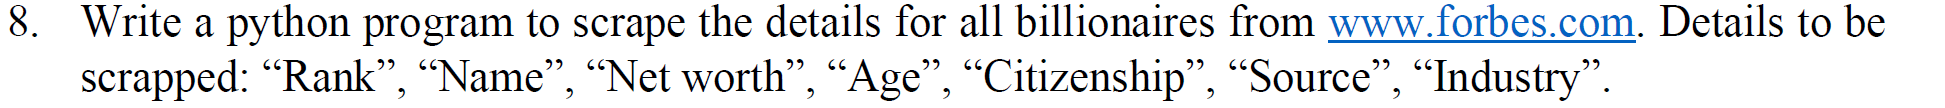

In [1]:
# importing required libraries
import pandas as pd
import warnings
import time
warnings.filterwarnings("ignore")
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [2]:
# initating the chrome web driver
driver = webdriver.Chrome("D:\Web Scrapper\chromedriver.exe")

# getting to the url
driver.get("https://www.forbes.com/billionaires/")
time.sleep(2)

In [3]:
h = driver.find_elements_by_xpath("//div[@class='header-row']")
dimension = [ha.text.split("\n") for ha in h]

In [4]:
ro = driver.find_elements_by_xpath("//div[@role='row']")
row = [roo.text.split("\n") for roo in ro]

In [5]:
row.pop(0)

['RANK',
 'NAME',
 'NET WORTH',
 'AGE',
 'COUNTRY / TERRITORY',
 'SOURCE',
 'INDUSTRY']

In [6]:
df= pd.DataFrame(row,columns=dimension)

In [7]:
df

,RANK,NAME,NET WORTH,AGE,COUNTRY / TERRITORY,SOURCE,INDUSTRY
0,1.,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2.,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3.,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4.,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5.,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
5,6.,Larry Page,$111 B,49,United States,Google,Technology
6,7.,Sergey Brin,$107 B,48,United States,Google,Technology
7,8.,Larry Ellison,$106 B,77,United States,software,Technology
8,9.,Steve Ballmer,$91.4 B,66,United States,Microsoft,Technology
9,10.,Mukesh Ambani,$90.7 B,64,India,diversified,Diversified


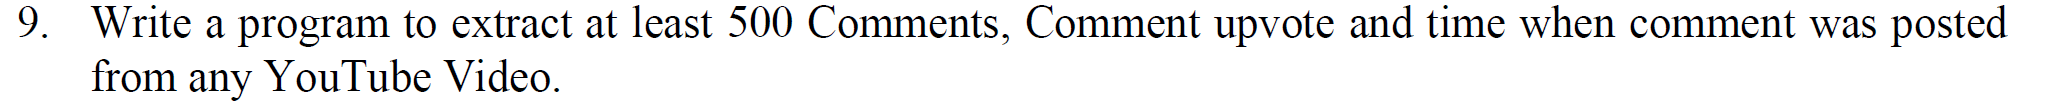

In [1]:
# importing required libraries
import pandas as pd
import warnings
import time
warnings.filterwarnings("ignore")
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [2]:
driver = webdriver.Chrome("D:\Web Scrapper\chromedriver.exe")
driver.get("https://www.youtube.com/watch?v=3FhiUJbQdyY&t=168s")
driver.maximize_window()
time.sleep(5)
for scr in range(1,10):
    scrol=scr*10000
    driver.execute_script("window.scrollBy(0,15000)")
    time.sleep(5)
    driver.execute_script("window.scrollBy(0,30000)")

In [3]:
comment=[]
like = []
tim=[]

In [4]:
soup = BeautifulSoup(driver.page_source)
k=soup.find_all('div',class_='style-scope ytd-comment-renderer')

for i in k:
    

    try:
        comment.append(i.find('div',class_="style-scope ytd-expander").text.replace("\n",""))
        
    except (TypeError, AttributeError):
        comment.append("")
    


In [5]:
l = soup.find_all('div',class_='style-scope ytd-comment-renderer')
for li in l:
    

    try:
        like.append(li.find('span',class_="style-scope ytd-comment-action-buttons-renderer").text.replace("\n",""))
        
    except (TypeError, AttributeError):
        like.append("")
    

In [6]:
t = soup.find_all('div',class_='style-scope ytd-comment-renderer')
for te in t:
    

    try:
        tim.append(te.find('a',class_="yt-simple-endpoint style-scope yt-formatted-string").text)
        
    except (TypeError, AttributeError):
        tim.append("")
    

In [40]:
df = pd.DataFrame()
df["Comment"] = comment
df["Upvote"] = like
df["Time"] = tim

In [41]:
df.drop_duplicates(subset ="Comment",
                     keep = 'first', inplace = True)

In [42]:
df

,Comment,Upvote,Time
0,,,
2,Merch is finally available!! Get it here https...,828,1 month ago
12,"Juan after cutting earphones: ""Wanna hang out ...",4.6K,1 month ago
22,Juan is the only person that can literally cut...,1.2K,1 month ago
32,I like how he gets shy after revealing the pra...,122,3 weeks ago
42,Suggestion: tell them that you suffer from “cu...,31,2 weeks ago (edited)
52,I love this dude.. he know how to do things sm...,148,1 month ago
62,"""Ah shit look at me just ended all big daw's v...",3,9 days ago
72,First scene was gold 😂,1.5K,1 month ago
82,The confidence Juan has to stay in character w...,11,8 days ago


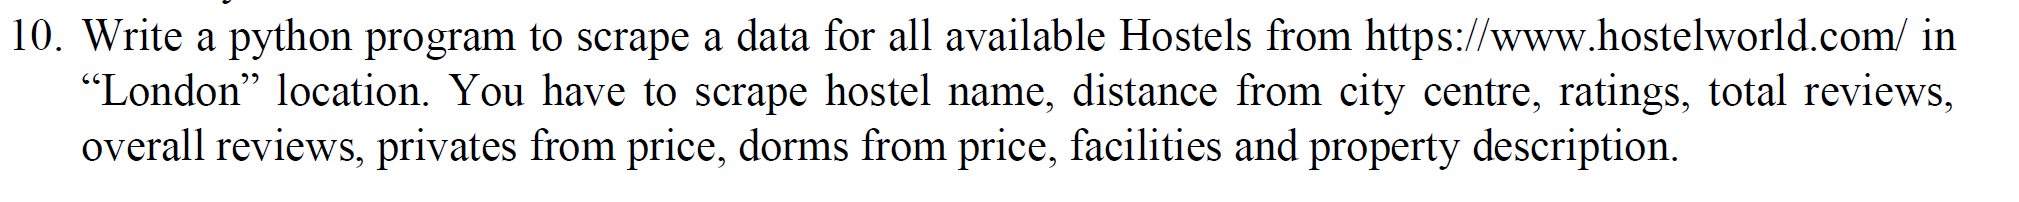

In [1]:
# importing required libraries
import pandas as pd
import warnings
import time
warnings.filterwarnings("ignore")
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
from selenium.common.exceptions import NoSuchElementException

In [2]:
# initating the chrome web driver
driver = webdriver.Chrome("D:\Web Scrapper\chromedriver.exe")

# getting to the url
driver.get("https://www.hostelworld.com/")
time.sleep(2)
# we get login page sometimes so in order to close ithttp://localhost:8888/notebooks/Desktop/PYTHON%20WORK/Fliprobo/Assignment/Worksheet%206/Web%20Scrapping%203.ipynb#

In [4]:
cl = driver.find_element_by_xpath("//input[@id='search-input-field']")
cl.send_keys("london")

In [6]:
cl1 = driver.find_element_by_xpath("//div[@class='label']")
cl1.click()

In [7]:
cl2=driver.find_element_by_xpath('/html/body/div[3]/div/div/div[1]/div[1]/div/div[2]/div[4]/div/div[2]/div/div[5]/button')
cl2.click()

In [8]:
urls=[]
url  = driver.find_elements_by_xpath("//h2[@class='title title-6']/a")
for i in url:
    urls.append(i.get_attribute('href'))  

In [9]:
name=[]
distance=[]
rating=[]
review=[]
private=[]
dorm=[]

In [10]:
a = driver.find_elements_by_xpath("//h2[@class='title title-6']")
name= [na.text for na in a]

In [11]:
b = driver.find_elements_by_xpath("//span[@class='description']")
distance= [di.text for di in b]

In [12]:
c = driver.find_elements_by_xpath("//div[@class='bottom-rating']")
rating= [ra.text.split("\n")[0] for ra in c]

In [13]:
d = driver.find_elements_by_xpath("//div[@class='reviews']")
review= [re.text for re in d]

In [14]:
pri=[]
drom=[]
e = driver.find_elements_by_xpath("//div[@class='price-col']")
for i in range(0,len(e)):
    if i%2==0:
        pri.append(e[i])
    else:
        drom.append(e[i])

In [15]:
private=[pr.text.replace("\n","") for pr in pri]
dorm = [do.text.replace("\n","") for do in drom]

In [56]:
def di():
    
    try:
        oa = driver.find_elements_by_xpath("//div[@class='rating-score body-3']")
        security.append(oa[0].text)
        loc.append(oa[1].text)
        staff.append(oa[2].text)
        atmosphere.append(oa[3].text)
        cleanliness.append(oa[4].text)
        facilities.append(oa[5].text)
        value.append(oa[6].text)
        
    except NoSuchElementException:      
        
        print("none")        
        

def dii():
    
    try:
        ob = driver.find_element_by_xpath("//div[@class='content collapse-content']")
        description.append(ob.text.replace("\n", " "))
   
    except NoSuchElementException:      
        
        description.append('-')        
        
                
def diii():
    
    try:
        oc = driver.find_element_by_xpath("//div[@id='facilities-section']")
        fac.append(oc.text.replace("\n", " "))
       
   
    except (NoSuchElementException,IndexError):      
        
        fac.append('-')        
        
                 

In [57]:
security=[]
loc=[]
staff=[]
atmosphere=[]
cleanliness=[]
facilities=[]
value=[]
description=[]
fac=[]


for ur in urls:
    driver.get(ur)
    time.sleep(5)
    di()
    dii()
    diii()

In [58]:
df = pd.DataFrame()
df["Hotel Name"] = name
df["Distance from city "]= distance
df["Rating"] = rating
df["Review"] = review
df["Price of private"] = private
df["Price of Dorn"] = dorm
df["Security Rating"] = security
df["Location Rating"] = loc
df["Staff Rating"] = staff
df["Cleanliness Rating"] = cleanliness
df["Facilities Rating"] = facilities
df["Value for Money"] = value
df["Property Description"] = description
df["Facilities Available"] = fac
df

,Hotel Name,Distance from city,Rating,Review,Price of private,Price of Dorn,Security Rating,Location Rating,Staff Rating,Cleanliness Rating,Facilities Rating,Value for Money,Property Description,Facilities Available
0,Urbany Hostel London,Hostel - 5.4km from city centre,9.3,316 Total Reviews,Privates FromRs20636,No Dorms Available,9.4,9.6,9.7,9.3,9,9.1,"Welcome to Urbany Hostel London, our first int...",Facilities Free Linen Included Free WiFi Gener...
1,Safestay London Elephant & Castle,Hostel - 1.7km from city centre,7.2,4265 Total Reviews,Privates FromRs18500,No Dorms Available,7.8,8,7,6.6,6.6,7.2,Safestay at Elephant & Castle is ideal if you ...,Facilities Free Linen Included Free City Maps ...
2,London Backpackers,Hostel - 11.9km from city centre,8.0,4244 Total Reviews,No Privates Available,Dorms FromRs5726,8.6,7.5,9,7.6,7.8,8.3,IMPORTANT NOTICE: This hostel is for 18 - 35-y...,Facilities Free Free Breakfast Linen Included ...
3,Hostel One Notting Hill,Hostel - 5.5km from city centre,8.9,1361 Total Reviews,Privates FromRs26255,No Dorms Available,9,9.1,9.4,8.5,8.6,8.8,The perfect place for solo travelers to connec...,Facilities Free Linen Included Free WiFi Free ...
4,St Christopher's Hammersmith,Hostel - 7.5km from city centre,7.9,4024 Total Reviews,No Privates Available,Dorms FromRs5349.48 Rs4815,8.3,9.1,8.3,7.2,6.9,7.9,I stayed here for just one night but I wish I ...,Facilities Free Linen Included Free City Maps ...
5,St Christopher's Greenwich,Hostel - 7.6km from city centre,7.5,3190 Total Reviews,No Privates Available,Dorms FromRs5131.97 Rs4619,7.8,8.3,7.5,7,7,7.6,COVID 19 Policy Update. In response to Coronav...,Facilities Free Linen Included Free City Maps ...
6,Selina Camden,Hostel - 5.5km from city centre,9.1,25 Total Reviews,Privates FromRs32692.89 Rs27789,Dorms FromRs9807.87 Rs8337,8.8,9,9.5,9.7,9.2,8.7,"Among underground music venues, innovative mus...",Facilities Free Linen Included Towels Included...
7,Saint James Backpackers,Hostel - 5.5km from city centre,6.6,1790 Total Reviews,Privates FromRs18893.12 Rs17948,Dorms FromRs8059.03 Rs7656,6.9,8.3,7.7,5.2,5.4,6.3,"Wonderful place. Great atmosphere, friendly an...",Facilities Free Free Breakfast Linen Included ...
8,Barry House,Bed and Breakfast - 4.2km from city centre,8.6,10 Total Reviews,Privates FromRs16542,No Dorms Available,9,9.5,9,9.5,8,8.5,Barry House is a Central London bed and breakf...,Facilities Free Free Breakfast Free City Maps ...
9,Elmwood Hotel,Hotel - 3.2km from city centre,7.1,115 Total Reviews,Privates FromRs32628,No Dorms Available,8,9,7,7,6,7,We booked 2 rooms but were told by the recepti...,Facilities Free Free Internet Access General H...
